# Denoising results visualization

In [1]:
import os
import sys

sys.path.append(os.path.join(os.getcwd(), ".."))

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.colors import LogNorm

data_path = os.path.join(os.getcwd(), "..", "cubes")
results_path = os.path.join(os.getcwd(), "out_dense_ae")

In [2]:
# Loading of data

line_name = "12cn10_small"

mask_cube = fits.open(os.path.join(data_path, line_name, f"{line_name}_mask.fits"))[0].data
noise_map = fits.open(os.path.join(data_path, line_name, f"{line_name}_noise_map.fits"))[0].data

X = fits.open(os.path.join(f"output_{line_name}", "input.fits"))
X_hat = fits.open(os.path.join(f"output_{line_name}", "output.fits"))
Residuals = fits.open(os.path.join(f"output_{line_name}", "residuals.fits"))

## Mean profiles

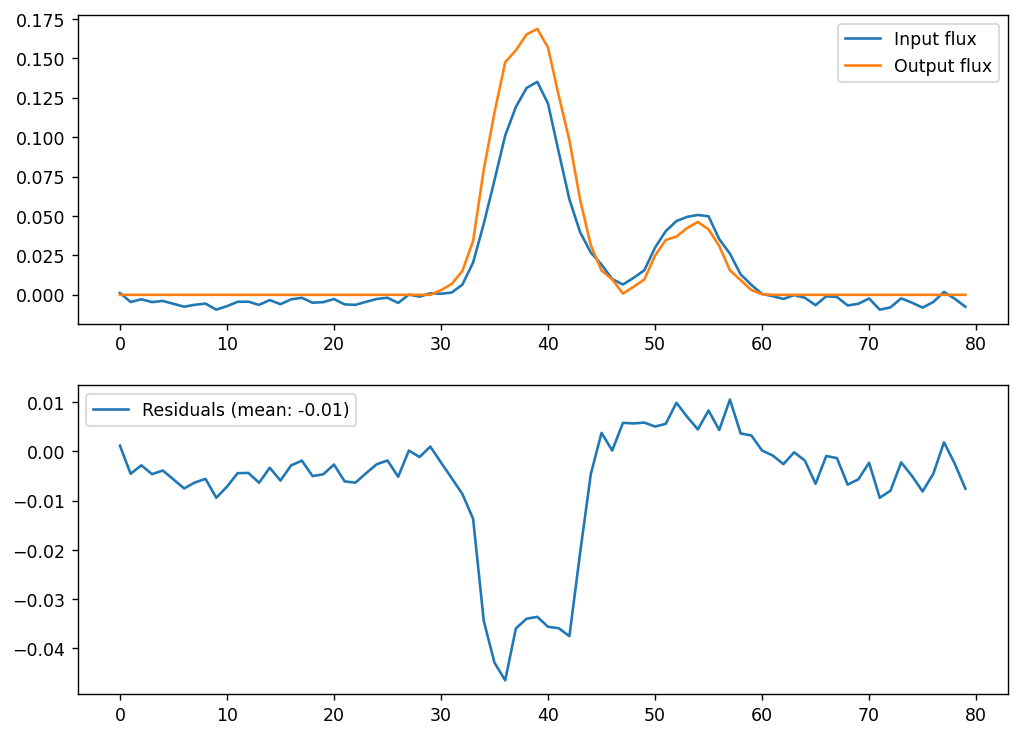

In [11]:
plt.figure(figsize=(1.5*6.4, 1.5*4.8), dpi=125)

plt.subplot(2, 1, 1)
plt.plot(np.mean(X, axis=(1, 2)), label="Input flux")
plt.plot(np.mean(X_hat, axis=(1, 2)), label="Output flux")

plt.legend()

plt.subplot(2, 1, 2)
plt.plot(np.mean(Residuals, axis=(1, 2)), label=f"Residuals (mean: {np.mean(Residuals):.2f})")

plt.legend()

plt.show()

## RMS of residuals

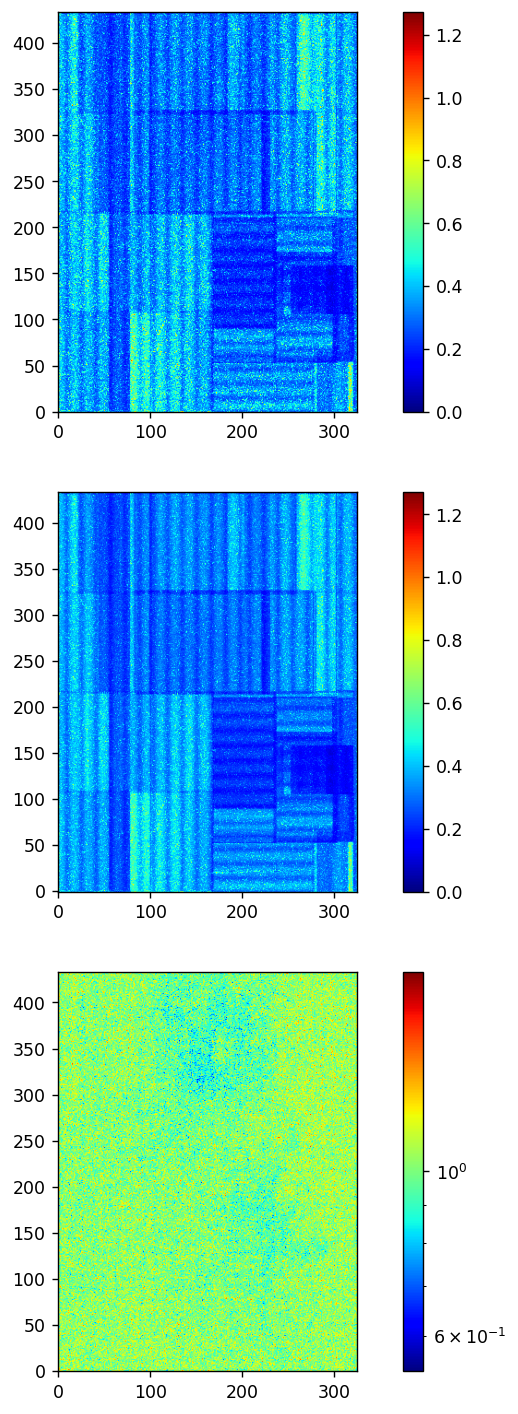

In [12]:
Residuals_rms = np.mean(Residuals**2, axis=0)**0.5
Norm_residuals_rms = Residuals_rms / noise_map

#

plt.figure(figsize=(2.5*6.4, 1.5*4.8), dpi=125)

plt.subplot(1, 3, 1)

vmin = 0
vmax = np.max(np.abs(Residuals_rms))

plt.imshow(Residuals_rms, origin="lower", cmap="jet", vmin=vmin, vmax=vmax)
plt.colorbar()
plt.title("RMS of residuals")

plt.subplot(1, 3, 2)

vmin = 0
vmax = np.max(np.abs(Residuals_rms))

plt.imshow(noise_map, origin="lower", cmap="jet", vmin=vmin, vmax=vmax)
plt.colorbar()
plt.title("Noise map")

plt.subplot(1, 3, 3)

vmax = max(np.max(1/Norm_residuals_rms), np.max(Norm_residuals_rms))

plt.imshow(Norm_residuals_rms, origin="lower", cmap="jet", norm=LogNorm(1/vmax, vmax))
plt.colorbar()
plt.title("RMS of normalized residues")

plt.show()

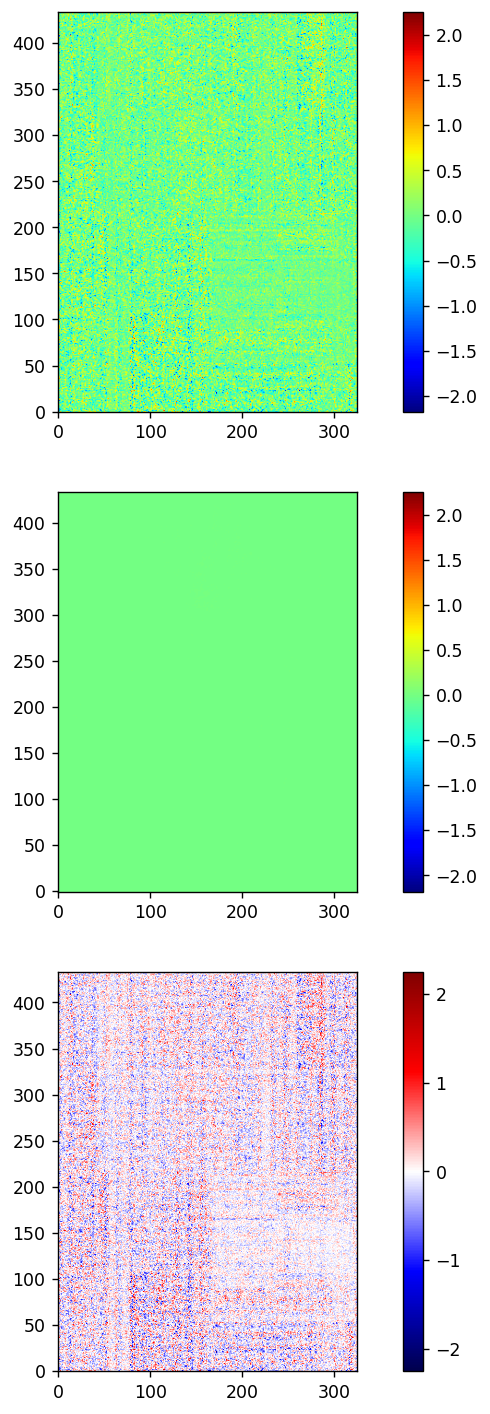

In [13]:
channel = 28

#

plt.figure(figsize=(2.5*6.4, 1.5*4.8), dpi=125)

vmin = min(np.min(X[channel]), np.min(X_hat[channel]))
vmax = max(np.max(X[channel]), np.max(X_hat[channel]))

plt.subplot(1, 3, 1)
plt.imshow(X[channel], origin="lower", cmap="jet", vmin=vmin, vmax=vmax)
plt.colorbar()
plt.title(f"Input (channel {channel})")

plt.subplot(1, 3, 2)
plt.imshow(X_hat[channel], origin="lower", cmap="jet", vmin=vmin, vmax=vmax)
plt.colorbar()
plt.title(f"Output (channel {channel})")

vmax = max(np.max(np.abs(Residuals[channel])), np.max(np.abs(Residuals[channel])))

plt.subplot(1, 3, 3)
plt.imshow(Residuals[channel], origin="lower", cmap="seismic", vmin=-vmax, vmax=vmax)
plt.colorbar()
plt.title(f"Residuals (channel {channel})")

plt.show()